# Pachete necesare pentru folosirea acestui Notebook

Vom folosi [scipy](https://scipy.org/), [numpy](https://numpy.org/) și [matplotlib](https://matplotlib.org/).

In [113]:
from scipy import ndimage, datasets
import numpy as np
import matplotlib.pyplot as plt
import os

# Imaginea cu care lucrăm

Vom folosi o imagine din setul de date oferit implicit de către scipy.

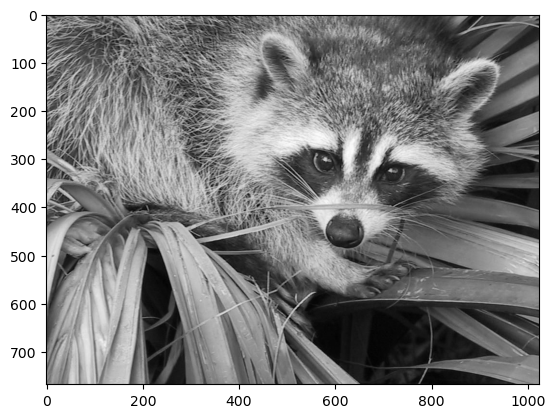

In [114]:
X = datasets.face(gray=True)
plt.imshow(X, cmap=plt.cm.gray)
plt.show()

# Transformata Fourier a unei imagini

Transformata Fourier Discretă se extinde ușor la mai multe dimensiuni. Pentru un semnal bidimensional precum o imagine DFT devine:

$$
Y_{m_1,m_2} = \sum_{n_1=0}^{N_1-1}\sum_{n_2=0}^{N_2-1}x_{n_1,n_2}e^{-j2\pi(m_1 n_1/N_1 + m_2 n_2/N_2)}
$$

* unde $n_1$ și $n_2$ sunt pozițile pixelilor pe orizontală, respectiv, pe verticală
* bin-urile rezultate corespund pozițiilor pixelilor
* spectrul este în continuare simetric
* proprietățile transformatei DFT 1D sunt respectate și în cazul celei 2D

În continuare vom folosi rutina generală `fft2` ce servește mai bine activității de învățare, deși pentru semnale reale ar trebui să folosim `rfft2` ce întoarce doar informația esențială (ex. omite simetriile). De asemenea vom analiza spectrul în scală logaritmică pentru a diferenția mai bine magnitudinile bin-urilor DTF.

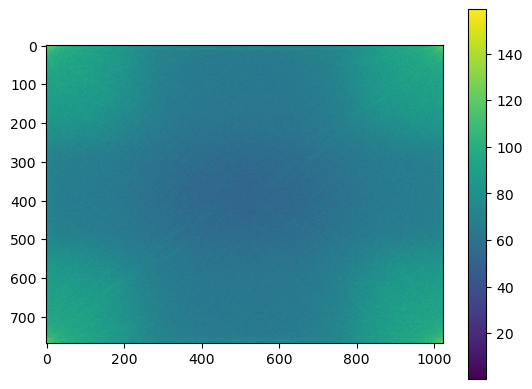

In [115]:
Y = np.fft.fft2(X)
freq_db = 20*np.log10(abs(Y))

plt.imshow(freq_db)
plt.colorbar()
plt.show()

Operațiile efectuate direct asupra imaginii se reflectă și în spectrul acesteia. Iată un exemplu a unei rotații de 45 de grade:

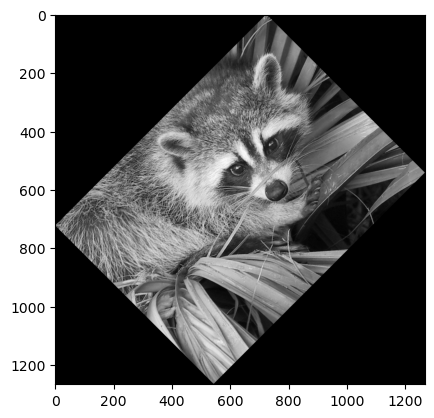

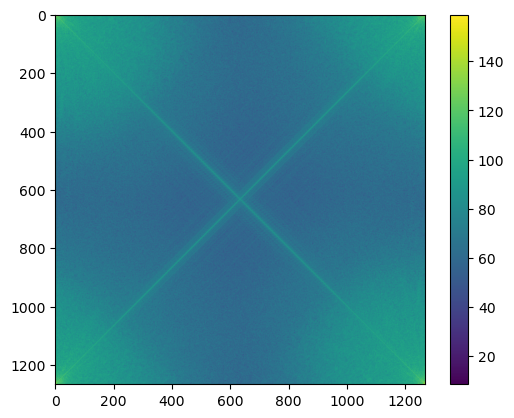

In [116]:
rotate_angle = 45
X45 = ndimage.rotate(X, rotate_angle)
plt.imshow(X45, cmap=plt.cm.gray)
plt.show()

Y45 = np.fft.fft2(X45)
plt.imshow(20*np.log10(abs(Y45)))
plt.colorbar()
plt.show()

Momentan pe axe sunt afișate numărul bin-urilor. Pentru a obține frecvențele asociate folosiți `fftfreq`:

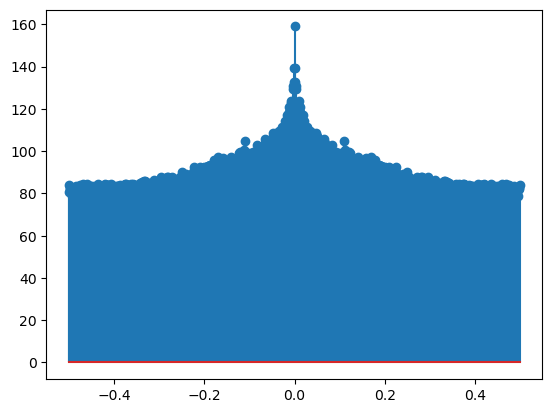

In [117]:
freq_x = np.fft.fftfreq(X.shape[1])
freq_y = np.fft.fftfreq(X.shape[0])

plt.stem(freq_x, freq_db[:][0])
plt.show()

# Atenuarea frecvențelor înalte

Pentru a anula frecvențele de peste un anumit prag `freq_cutoff` putem pur și simplu anula intrările din spectru și aplica transformata Fourier inversă:

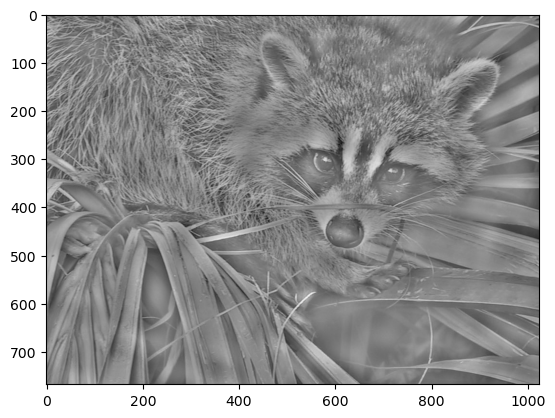

In [118]:
freq_cutoff = 120

Y_cutoff = Y.copy()
Y_cutoff[freq_db > freq_cutoff] = 0
X_cutoff = np.fft.ifft2(Y_cutoff)
X_cutoff = np.real(X_cutoff)    # avoid rounding erros in the complex domain,
                                # in practice use irfft2
plt.imshow(X_cutoff, cmap=plt.cm.gray)
plt.show()

# Zgomot

Zgomotul alb perturbă în mod egal spectrul semnalului. Este astfel egal distribuit și regăsit în toate bin-urile DFT. [Zgomotul color](https://en.wikipedia.org/wiki/Colors_of_noise) se schimbă de-a lungul frecvențelor.

Putem adăuga zgomot în limita a `pixel_noise` pixeli imaginii folosind `random.randint`:

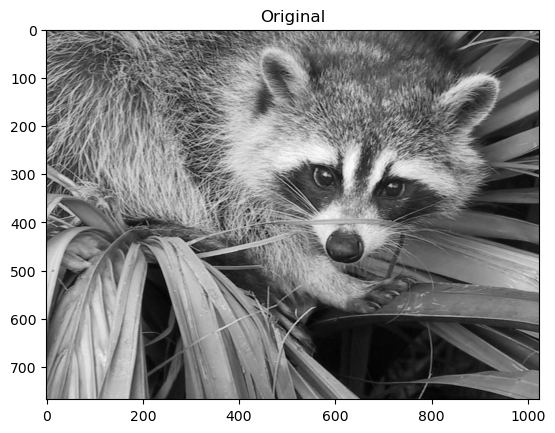

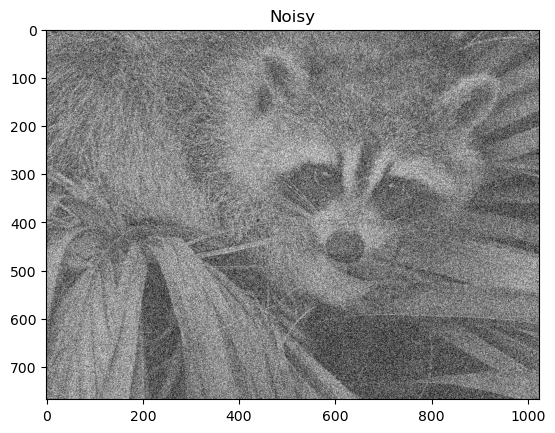

In [119]:
pixel_noise = 200

noise = np.random.randint(-pixel_noise, high=pixel_noise+1, size=X.shape)
X_noisy = X + noise
plt.imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.show()
plt.imshow(X_noisy, cmap=plt.cm.gray)
plt.title('Noisy')
plt.show()

# Sarcini

1. Produceți imaginile și spectrul pentru funcțiile de mai jos și dați o explicație scurtă pentru fiecare rezultat.
* $x_{n_1,n_2} = \sin(2\pi n_1 + 3\pi n_2)$
* $x_{n_1,n_2} = \sin(4\pi n_1) + \cos(6\pi n_2)$
* $Y_{0,5} = Y_{0,N-5} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$
* $Y_{5,0} = Y_{N-5,0} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$
* $Y_{5,5} = Y_{N-5,N-5} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$

*Atenție*: $x$ reprezintă informație în domeniul timpului, $Y$ în domeninul frecvenței.

2. Comprimați imaginea cu ratonul de mai sus prin atenuarea frecvențelor înalte până la un prag SNR autoimpus.

3. Eliminați zgomotul adăugat la imaginea cu ratonul produsă mai sus. Prezentați raportul SNR înainte și după.

Ex1

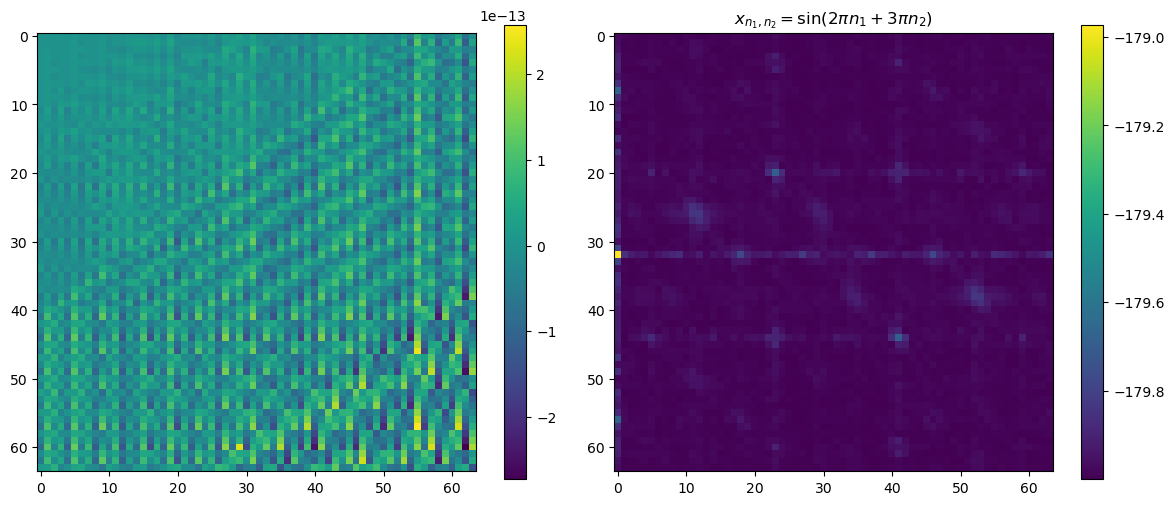

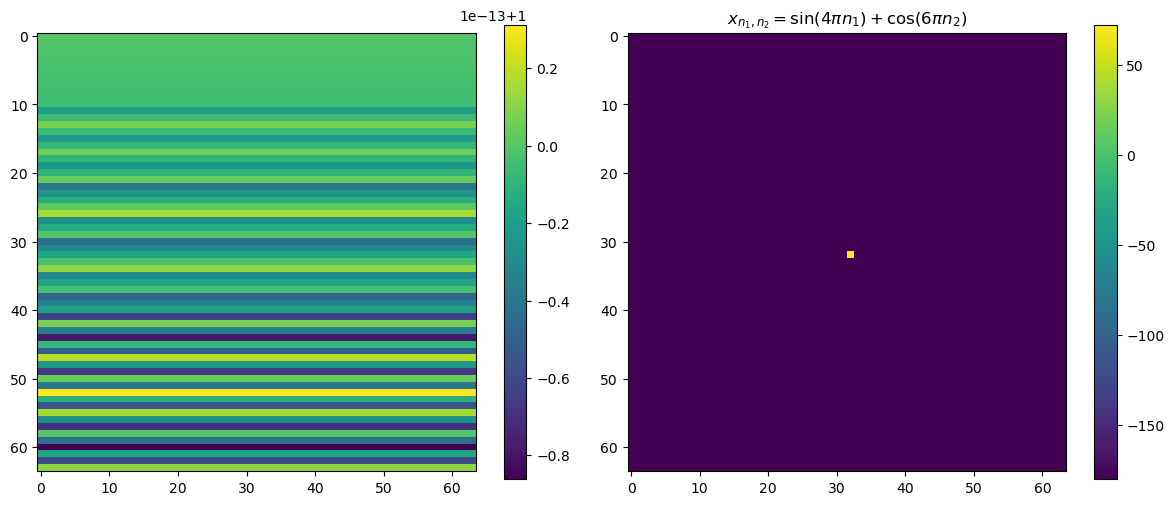

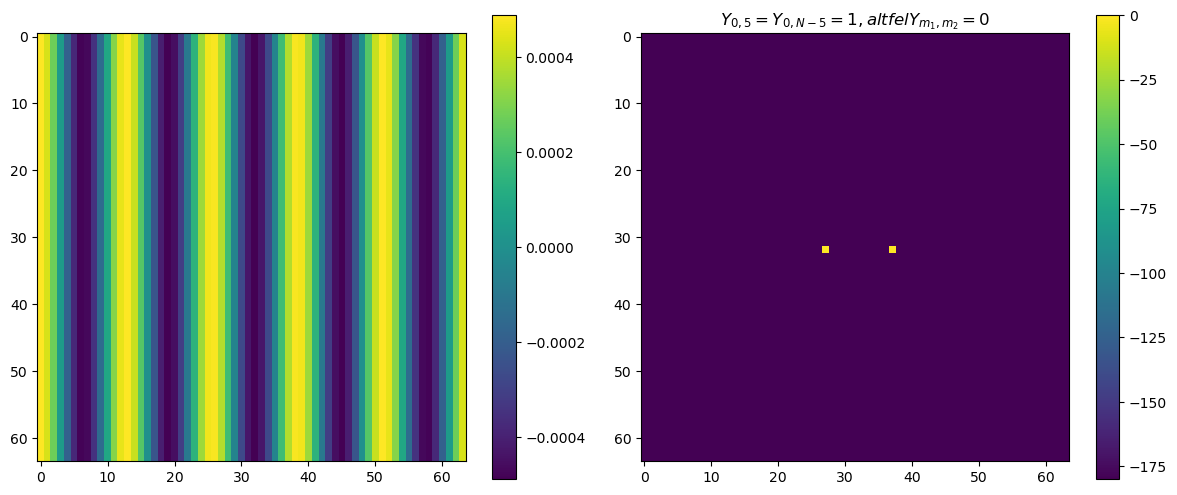

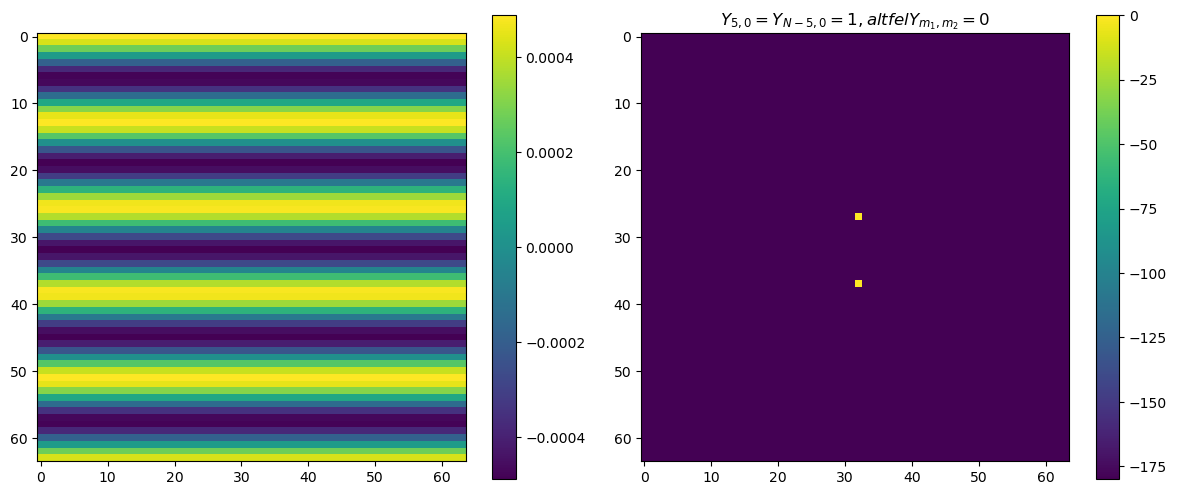

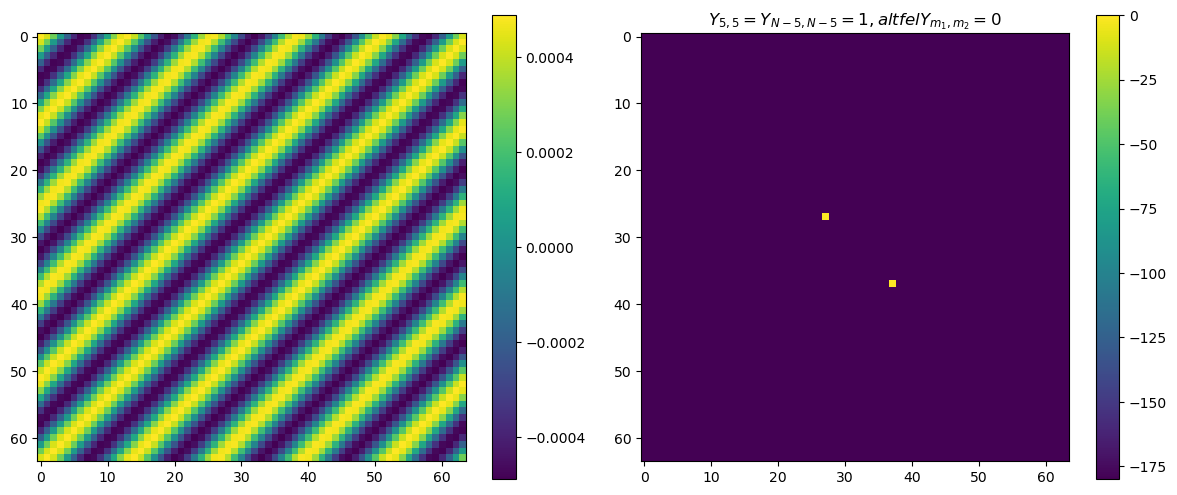

In [120]:
# a)
os.makedirs("./lab7_plots", exist_ok=True)
os.makedirs("./lab7_plots/ex1", exist_ok=True)
k = 0

def afiseaza_plot(X, Y, titlu=None):
    global k
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    plt.title(f"{titlu}")
    
    im1 = axs[0].imshow(X, cmap='viridis')
    plt.colorbar(im1, ax=axs[0])
    
    # pastrez in engleza freq_db
    freq_db = 20*np.log10(np.abs(Y)+1e-9) # pt a evita div by zero
    freq_db_shift = np.fft.fftshift(freq_db) # rearanjare comp de frecv pt frecv negative aflate in stanga, urmate de comp continua si frecv pozitive in dreapta
    im2 = axs[1].imshow(freq_db_shift, cmap='viridis')
    plt.colorbar(im2, ax=axs[1])
    
    plt.tight_layout()
    plt.savefig(f"lab7_plots/ex1/imagini_spectru_ex{k}.pdf", format="pdf")
    plt.show()

dim = (64, 64)
# a)
k += 1
X_a = np.zeros(dim) # imaginea de o matrice
for n1 in range(dim[0]):
    for n2 in range(dim[1]):
        X_a[n1, n2] = np.sin(4*np.pi*n1+3*np.pi*n2)

Y_a = np.fft.fft2(X_a)

afiseaza_plot(X_a, Y_a, "$x_{n_1,n_2} = \sin(2\pi n_1 + 3\pi n_2)$")
# b)
k += 1
X_b = np.zeros(dim) # imaginea de o matrice
for n1 in range(dim[0]):
    for n2 in range(dim[1]):
        X_b[n1, n2] = np.sin(4*np.pi*n1)+np.cos(6*np.pi*n2)

Y_b = np.fft.fft2(X_b)

afiseaza_plot(X_b, Y_b, "$x_{n_1,n_2} = \sin(4\pi n_1) + \cos(6\pi n_2)$")
# c)
k += 1
N = dim[0]
Y_c = np.zeros(dim, dtype=complex)
Y_c[0, 5] = 1
Y_c[0, N-5] = 1
X_c = np.real(np.fft.ifft2(Y_c))

afiseaza_plot(X_c, Y_c, "$Y_{0,5} = Y_{0,N-5} = 1, altfel Y_{m_1,m_2} = 0$")
# d)
k += 1
Y_d = Y_c.T
X_d = np.real(np.fft.ifft2(Y_d))

afiseaza_plot(X_d, Y_d, "$Y_{5,0} = Y_{N-5,0} = 1, altfel Y_{m_1,m_2} = 0$")
# e)
k += 1
Y_e = np.zeros(dim, dtype=complex)
Y_e[5, 5] = 1
Y_e[N-5, N-5] = 1
X_e = np.real(np.fft.ifft2(Y_e))

afiseaza_plot(X_e, Y_e, "$Y_{5,5} = Y_{N-5,N-5} = 1, altfel Y_{m_1,m_2} = 0$")

Ex2

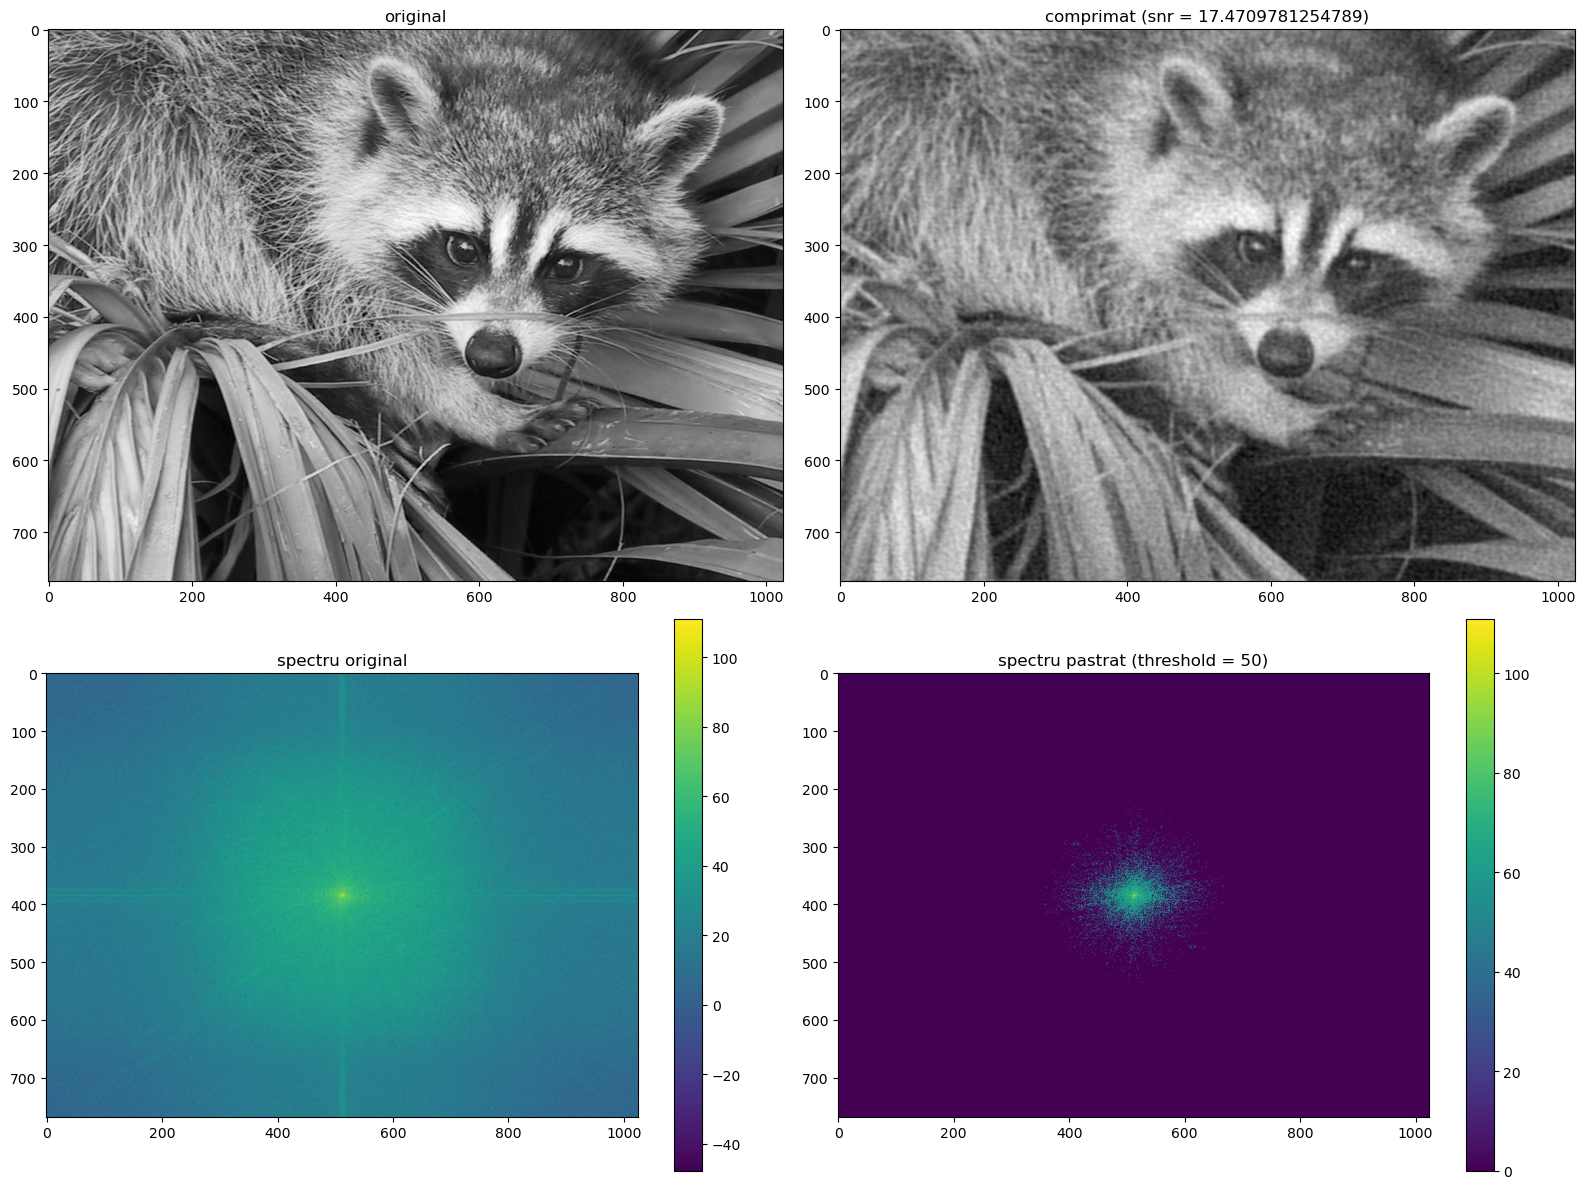

In [121]:
os.makedirs("./lab7_plots/ex2", exist_ok=True)

X = datasets.face(gray=True)/np.iinfo(np.uint8).max # normalizat intre 0 si 1, in loc de 0 si np.iinfo(np.uint8).max pt ca ar fi explodat si freq_db altfel
Y = np.fft.fft2(X)
freq_db = 20*np.log10(np.abs(Y)+1e-9)

threshold = 50
Y_comp = Y.copy() # Y comprimat
Y_comp[freq_db<threshold] = 0 # frecventele slabe sunt eliminate, dupa care se face ifft pentru reconstructia imaginii
X_comp = np.real(np.fft.ifft2(Y_comp))

putere_semnal = np.mean(X**2)
putere_zgomot = np.mean((X-X_comp)**2)
snr_db = 10*np.log10(putere_semnal/putere_zgomot) # conversie frecv in timp

fig, axs = plt.subplots(2, 2, figsize=(16, 12))

axs[0, 0].imshow(X, cmap='gray')
axs[0, 0].set_title('original')
axs[0, 1].imshow(X_comp, cmap='gray')
axs[0, 1].set_title(f'comprimat (snr = {snr_db})')

freq_db_shift = np.fft.fftshift(freq_db)
im1 = axs[1, 0].imshow(freq_db_shift, cmap='viridis')
axs[1, 0].set_title('spectru original')
im2 = axs[1, 1].imshow(np.fft.fftshift(freq_db*(freq_db>=threshold)), cmap='viridis')
axs[1, 1].set_title(f'spectru pastrat (threshold = {threshold})')
plt.colorbar(im1, ax=axs[1, 0])
plt.colorbar(im2, ax=axs[1, 1])

plt.tight_layout()
plt.savefig(f"lab7_plots/ex2/compresie_snr_img_raton.pdf", format="pdf")
plt.show()

Ex3

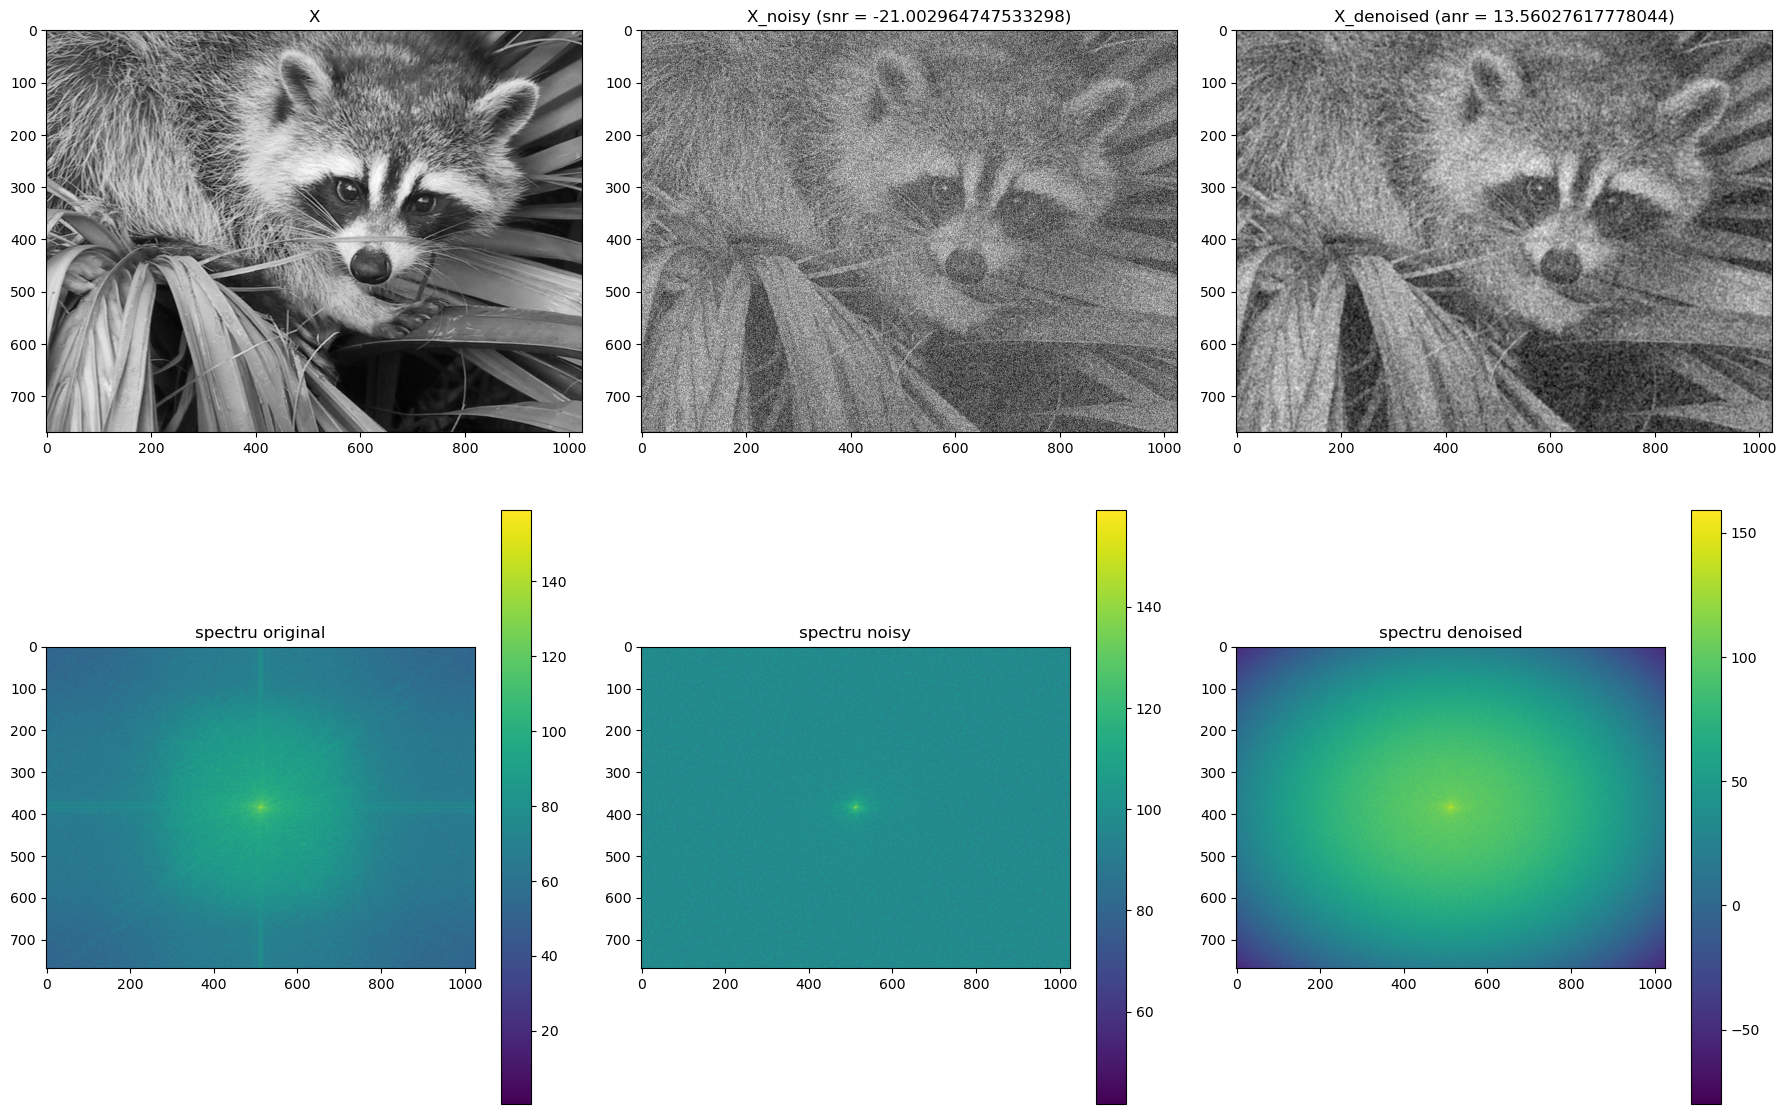

imbunatatire snr:
 snr_db_initial = -21.002964747533298, snr_db_final = 13.56027617778044, dif = 34.563240925313735


In [124]:
os.makedirs("./lab7_plots/ex3", exist_ok=True)

X = datasets.face(gray=True)

pixel_noise = 200
noise = np.random.randint(-pixel_noise, high=pixel_noise+1, size=X.shape)
X_noisy = X + noise # pastrez in engleza X_noisy si X_denoised

putere_semnal_initial = np.mean(X**2)
putere_zgomot_initial = np.mean(noise**2) # in subpucntul anterior era X-X_comp acest zgomot
snr_db_initial = 10*np.log10(putere_semnal_initial/putere_zgomot_initial) # trebuie determinat snr-ul init

Y_noisy = np.fft.fft2(X_noisy)

sigma = 0.12 # trebuie sa fie intre 0 si frecv Nyquist
m = np.linspace(-0.5, 0.5, Y_noisy.shape[1]) # frecv sunt normalizate deci respect teorema Nyquist, unde fs = 1 esantion per pixel, deci frecv Nyquist = 0.5 cicluri per pixel
n = np.linspace(-0.5, 0.5, Y_noisy.shape[0])
M, N = np.meshgrid(m, n)
kernel = np.exp(-(M**2+N**2)/(2*sigma**2)) # formula filtru Gaussian
filtru = np.fft.fftshift(kernel) # va fi un kernel centrat datorita lui shift, in mijloc fiind comp continua

Y_denoised = Y_noisy*filtru # domeniul frecv
X_denoised = np.real(np.fft.ifft2(Y_denoised)) # reconstructie fara zgomot
zgomot_ramas = X-X_denoised
putere_semnal_final = np.mean(X_denoised**2)
putere_zgomot_final = np.mean(zgomot_ramas**2)
snr_db_final = 10*np.log10(putere_semnal_final/putere_zgomot_final) # trebuie determinat snr-ul final dupa eliminarea zgomotului

Y_original = np.fft.fft2(X)
freq_db_original_shift = np.fft.fftshift(20*np.log10(np.abs(Y_original)+1e-9))
freq_db_noisy_shift = np.fft.fftshift(20*np.log10(np.abs(Y_noisy)+1e-9))
freq_db_denoised_shift = np.fft.fftshift(20*np.log10(np.abs(Y_denoised)+1e-9))

fig, axs = plt.subplots(2, 3, figsize=(18, 12))

axs[0, 0].imshow(X, cmap='gray')
axs[0, 0].set_title('X')
axs[0, 1].imshow(X_noisy, cmap='gray')
axs[0, 1].set_title(f'X_noisy (snr = {snr_db_initial})')
axs[0, 2].imshow(X_denoised, cmap='gray')
axs[0, 2].set_title(f'X_denoised (anr = {snr_db_final})')

im1 = axs[1, 0].imshow(freq_db_original_shift, cmap='viridis')
axs[1, 0].set_title('spectru original')
im2 = axs[1, 1].imshow(freq_db_noisy_shift, cmap='viridis')
axs[1, 1].set_title('spectru noisy')
im3 = axs[1, 2].imshow(freq_db_denoised_shift, cmap='viridis')
axs[1, 2].set_title('spectru denoised')
plt.colorbar(im1, ax=axs[1, 0])
plt.colorbar(im2, ax=axs[1, 1])
plt.colorbar(im3, ax=axs[1, 2])

plt.tight_layout()
plt.savefig(f"lab7_plots/ex3/reconstructie_denoising_img_raton.pdf", format="pdf")
plt.show()

print(f"imbunatatire snr:\n snr_db_initial = {snr_db_initial}, snr_db_final = {snr_db_final}, dif = {snr_db_final-snr_db_initial}")